In [1]:
from sklearn.model_selection import train_test_split
from bltk.langtools import Tokenizer # BLTK: The Bengali Natural Language Processing Toolkit
from bltk.langtools import remove_stopwords
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

import collections
import nltk
import numpy as np
import pandas as pd
import codecs

In [2]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)

In [3]:
print(f'Vowels: {vowels}')
print(f'Vowel signs: {vowel_signs}')
print(f'Consonants: {consonants}')
print(f'Digits: {digits}')
print(f'Operators: {operators}')
print(f'Punctuation marks: {punctuations}')
print(f'Others: {others}')

Vowels: ['অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'ঌ', 'এ', 'ঐ', 'ও', 'ঔ']
Vowel signs: ['া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ৄ', 'ে', 'ৈ', 'ো', 'ৌ']
Consonants: ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়', 'ৎ', 'ং', 'ঃ', 'ঁ']
Digits: ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']
Operators: ['=', '+', '-', '*', '/', '%', '<', '>', '×', '÷']
Punctuation marks: ['।', ',', ';', ':', '?', '!', "'", '.', '"', '-', '[', ']', '{', '}', '(', ')', '–', '—', '―', '~']
Others: ['৳', '৺', '্', 'ঀ', 'ঽ', '#', '$']


In [4]:
print(f'Vowels: {vowels}')

Vowels: ['অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'ঌ', 'এ', 'ঐ', 'ও', 'ঔ']


In [5]:
print(f'Vowel Signs: {vowel_signs}')

Vowel Signs: ['া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ৄ', 'ে', 'ৈ', 'ো', 'ৌ']


In [6]:
print(f'Consonants: {consonants}')

Consonants: ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়', 'ৎ', 'ং', 'ঃ', 'ঁ']


In [7]:
print(f'Digits: {digits}')

Digits: ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']


In [8]:
print(f'Operators: {operators}')

Operators: ['=', '+', '-', '*', '/', '%', '<', '>', '×', '÷']


In [9]:
print(f'Punctuation marks: {punctuations}')

Punctuation marks: ['।', ',', ';', ':', '?', '!', "'", '.', '"', '-', '[', ']', '{', '}', '(', ')', '–', '—', '―', '~']


In [10]:
print(f'Others: {others}')

Others: ['৳', '৺', '্', 'ঀ', 'ঽ', '#', '$']


In [11]:
input_file = 'comment2.txt'
stopwords_list = 'stopwords.txt'

In [12]:
counter = collections.Counter()
tokenizer = Tokenizer()
maxlen = 0
xs, ys = [], []

bangla_stopwords = codecs.open(stopwords_list, 'r', encoding='utf-8').read().split()


# print(bangla_stopwords)
# print(len(bangla_stopwords))
  
    
fin = codecs.open(input_file, 'r', encoding='utf-8')

for line in fin:
    
    _, sent = line.strip().split('\t')
    print("Label: ", _)
    print("Sentence: ", sent)
    
    words = tokenizer.word_tokenizer(sent)
    print("After Tokenizer: ", words)
    
    wordsExcludingPunctuationsMarks = [word for word in words if word not in punctuations]
    print("Truncating punctuations: ", wordsExcludingPunctuationsMarks)
    
    wordsExcludingStopWords = [word.strip() for word in wordsExcludingPunctuationsMarks if word not in bangla_stopwords]
    print("Truncating StopWords:", wordsExcludingStopWords)
    
    
    ys.append(int(_))
    xs.append(' '.join(wordsExcludingStopWords))
    
    
fin.close()

Label:  1
Sentence:  ভালো একটি প্রোডাক্ট পেয়েছি ধন্যবাদ দারাজ ধন্যবাদ ডেলিভারি বয় এন্ড ইউজ করে আরো ভালো লাগছে অন্যেরাও কিনতে পারেন আপনাদের পূর্ণ খুব ভালো
After Tokenizer:  ['ভালো', 'একটি', 'প্রোডাক্ট', 'পেয়েছি', 'ধন্যবাদ', 'দারাজ', 'ধন্যবাদ', 'ডেলিভারি', 'বয়', 'এন্ড', 'ইউজ', 'করে', 'আরো', 'ভালো', 'লাগছে', 'অন্যেরাও', 'কিনতে', 'পারেন', 'আপনাদের', 'পূর্ণ', 'খুব', 'ভালো']
Truncating punctuations:  ['ভালো', 'একটি', 'প্রোডাক্ট', 'পেয়েছি', 'ধন্যবাদ', 'দারাজ', 'ধন্যবাদ', 'ডেলিভারি', 'বয়', 'এন্ড', 'ইউজ', 'করে', 'আরো', 'ভালো', 'লাগছে', 'অন্যেরাও', 'কিনতে', 'পারেন', 'আপনাদের', 'পূর্ণ', 'খুব', 'ভালো']
Truncating StopWords: ['ভালো', 'প্রোডাক্ট', 'পেয়েছি', 'ধন্যবাদ', 'দারাজ', 'ধন্যবাদ', 'ডেলিভারি', 'বয়', 'এন্ড', 'ইউজ', 'আরো', 'ভালো', 'লাগছে', 'অন্যেরাও', 'কিনতে', 'আপনাদের', 'পূর্ণ', 'ভালো']
Label:  1
Sentence:  এবং আপনাদের ডেলিভারি মেন খুব ভালো
After Tokenizer:  ['এবং', 'আপনাদের', 'ডেলিভারি', 'মেন', 'খুব', 'ভালো']
Truncating punctuations:  ['এবং', 'আপনাদের', 'ডেলিভারি', 'মেন', 'খুব', 'ভালো'

In [13]:
xs
    

['ভালো প্রোডাক্ট পেয়েছি ধন্যবাদ দারাজ ধন্যবাদ ডেলিভারি বয় এন্ড ইউজ আরো ভালো লাগছে অন্যেরাও কিনতে আপনাদের পূর্ণ ভালো',
 'আপনাদের ডেলিভারি মেন ভালো',
 'তাড়াতাড়ি পণ্য গেলাম,ধন্যবাদ',
 'একদম ভাল না সবিতে যেরকম সিলো না পুরান',
 'রিটান দিলে নেয়না',
 'নিতাম না',
 'নিবেন না',
 'অল্প টাকায় প্রডাক্ট টা ভালো',
 'বিড়ি খোর দের দরকারি একটা প্রডাক্ট চাইলে',
 'সেলারের ভালো ছিলো',
 'ধন্যবাদ দারাজ',
 'লাইটার টা সুন্দর',
 'ব্যাটারি ক্যাপাসিটি আরেকটু বেশি ভালো হতো দাম ঠিক',
 'একটা কথা না বললেই নয় প্যাকেটটা একদম ইনটেক দারাজ সেলারকে ধন্যবাদ',
 'অল দ্যা বেস্ট দারাজ',
 'অল্প টাকায় প্রডাক্ট টা ভালো',
 'সেলারের ভালো ছিলো',
 'ভালো প্রডাক্ট চাইলে আপনারা কিনতে',
 'আলহামদুলিল্লাহ প্রোডাক্ট টা খুবই ভালো',
 'আলহামদুলিল্লাহ ভালো প্রোডাক্টটা ভালো চার্জ ভালো ভালো আপনারা চাইলে',
 'সেলার ভাইকে ধন্যবাদ কারন পন্য বাসাত ঠিক দেয়ার',
 'ভালো আপনারা',
 'জিনিস টা খুপ ভালো আপনারা চাইলে',
 'ভাল সবাই',
 'টা অর্ডার করছিলাম ঠিক তেমনটাই পেয়েছি ধন্যবাদ দার আজকে ধন্যবাদ ছেলের',
 'কম দামে জিনিস টা ভালো',
 'আপনেও চাইলে কিনতে সমস্যা ন

# TF-IDF

In [14]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state=0)
Xtrain

['ভাল',
 'ভালোই',
 'ভালো আশা দারাজ সাথে থাকুন',
 'আলহামদুলিল্লাহ প্রোডাক্ট টা খুবই ভালো',
 'ভাল পণ্য',
 'দুর্দান্ত পণ্য',
 'ভাল পণ্য ধন্যবাদ',
 'ধন্যবাদ সেলার প্রডাক্ট টা আসলে ভালো সবাই',
 'তাড়াতাড়ি পণ্য গেলাম,ধন্যবাদ',
 'বিল্ড কোয়ালিটি ভালো',
 'একদম লাইট ওয়েট',
 'পণ্য ভাল',
 'ধন্যবাদ দারাজ',
 'দারুন প্রডাক্ট',
 'পছন্দ হইছে',
 'ভালো হয়েছে',
 'পণ্য দিয়েছে',
 'দারাজ ভালো একটা পণ্য পেলাম',
 'প্রোডাক্ট মানে ভালো নিঃসন্দেহে কিনতে দ্বিতীয় অর্ডার',
 'ভাল জিনিস,সবাই',
 'চার্জ না রিটার্ন করলাম',
 'সত্যিই সিস্টেম পছন্দ',
 'দামের ভাল মানের বিক্রয়কর্মীর ধন্যবাদ',
 'আশা ভালো লাগবে যাক',
 'ভালো',
 'বললাম ভাই একটু দিয়ে যেতেন ভাল হতো দিয়ে না',
 'ব্যাবহার একদম সহজ বাতাসেও নিভে যাওয়ার ভয় নেই',
 'ধাতব ফিনিস ভাল মানের',
 'দাম বিবেচনায় জিনিসটা ভালো',
 'মোটামুটি মানের ভালো',
 'সুন্দর পণ্য পছন্দ',
 'প্রডাক্ট ভাল ভাল বন্দুরা',
 'খুবই ভালো একটা প্রডাক্ট',
 'প্লাস্টিকের তৈরি সূক্ষ্ম',
 'একটা কথা না বললেই নয় প্যাকেটটা একদম ইনটেক দারাজ সেলারকে ধন্যবাদ',
 'বিক্রেতা এছাড়াও ভাল',
 'ভাল মানের',
 'সেলার ভাইকে 

In [15]:
Xtest

['আপনেও চাইলে কিনতে সমস্যা নাই',
 'খারাপ না',
 'ভাল পণ্য',
 'দারাজের ডেলিভারি ম্যান ফালতু',
 'টা অর্ডার করছিলাম ঠিক তেমনটাই পেয়েছি ধন্যবাদ দার আজকে ধন্যবাদ ছেলের',
 'অল্প টাকায় প্রডাক্ট টা ভালো',
 'পাশে পাতলা',
 'ভাল',
 'ধন্যবাদ',
 'দাম বিবেচনা ভাল',
 'ধন্যবাদ বিক্রেতা ভাল লাইটার',
 'ভাল জিনিস',
 'ভালো',
 'চাইলে সবাই',
 'প্রোডাক্ট ভাল',
 'সন্তুষ্ট',
 'মাঝামাঝি ধরন পণ্য',
 'খারাপ পণ্য সময় ক্ষতিগ্রস্ত',
 'পণ্য পাইনি',
 'একজনকে গিফট করছিলাম',
 'সবাই কিনতে',
 'বিড়ি খোর দের দরকারি একটা প্রডাক্ট চাইলে',
 'ভালো',
 'খুবই ভালো একটা জিনিস',
 'ভাল পণ্য',
 'সন্তুষ্ট',
 'প্রোডাক্টটি ভাল পছন্দ',
 'লাইটার পেয়েছি চার্জার নেই',
 'ভাই জিনিস সুন্দর',
 'প্রোডাক্ট মান ভালো তৃতীয় অর্ডার সবাই',
 'সেলারের ভালো ছিলো',
 'আলহামদুলিল্লাহ ভালো প্রোডাক্টটা ভালো চার্জ ভালো ভালো আপনারা চাইলে',
 'চমৎকার',
 'ভাল পণ্য',
 'জিনিস টা খুপ ভালো আপনারা চাইলে',
 "ধন্যবাদ জানায় দারাজ'কে এনাদের যুক্ত সকলকে ধন্যবাদ",
 'গুণমান ভাল না',
 'ভাল পণ্য সন্তুষ্ট',
 'ভালো লাগসে']

In [16]:
tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split())
Xtrain_tf = tfidf.fit_transform(Xtrain)
print("n_samples: %d, n_features: %d" % Xtrain_tf.shape)

n_samples: 115, n_features: 731


C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [17]:
#transforming test data into tf-idf matrix
Xtest_tf = tfidf.transform(Xtest)
print("n_samples: %d, n_features: %d" % Xtest_tf.shape)

n_samples: 39, n_features: 731


# Naive Bayes

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [19]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(Xtrain_tf, Ytrain)

# predicted y
y_pred = naive_bayes_classifier.predict(Xtest_tf)

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[ 1  0  6]
 [ 0  0  1]
 [ 0  0 31]]
0.8205128205128205
              precision    recall  f1-score   support

          -1       1.00      0.14      0.25         7
           0       0.00      0.00      0.00         1
           1       0.82      1.00      0.90        31

    accuracy                           0.82        39
   macro avg       0.61      0.38      0.38        39
weighted avg       0.83      0.82      0.76        39



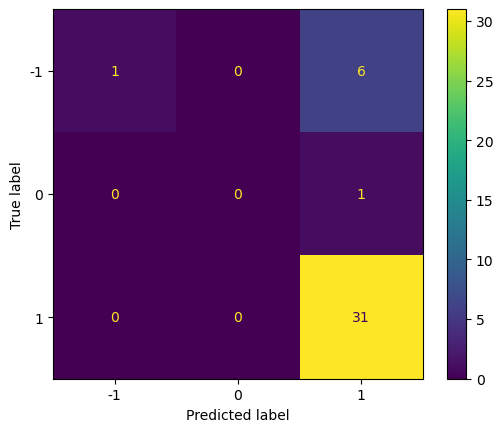

In [20]:
print(confusion_matrix(Ytest, y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=naive_bayes_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=naive_bayes_classifier.classes_)

disp.plot()
plt.show()

# Logistic Regression

[[ 1  0  6]
 [ 0  0  1]
 [ 0  0 31]]
0.8205128205128205
              precision    recall  f1-score   support

          -1       1.00      0.14      0.25         7
           0       0.00      0.00      0.00         1
           1       0.82      1.00      0.90        31

    accuracy                           0.82        39
   macro avg       0.61      0.38      0.38        39
weighted avg       0.83      0.82      0.76        39



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


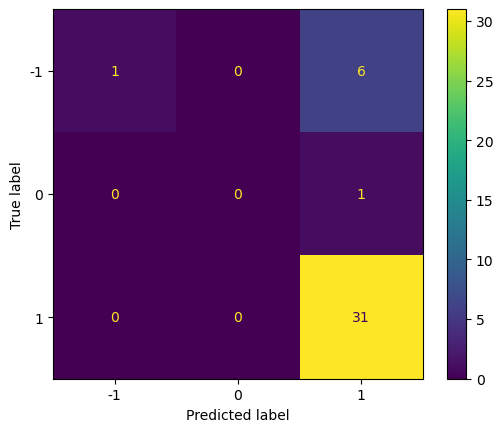

In [21]:
from sklearn.linear_model import LogisticRegression
LRClassification = LogisticRegression()
LRClassification.fit(Xtrain_tf, Ytrain)
y_pred=LRClassification.predict(Xtest_tf)
print(confusion_matrix(Ytest, y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=LRClassification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=LRClassification.classes_)
disp.plot()
plt.show()

# Decision Tree

[[ 3  0  4]
 [ 0  0  1]
 [ 0  0 31]]
0.8717948717948718
              precision    recall  f1-score   support

          -1       1.00      0.43      0.60         7
           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.93        31

    accuracy                           0.87        39
   macro avg       0.62      0.48      0.51        39
weighted avg       0.86      0.87      0.84        39



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


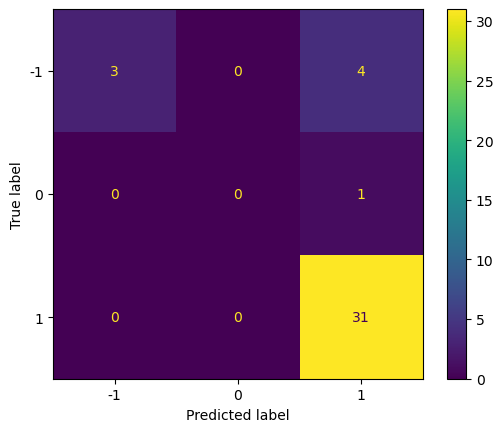

In [22]:
from sklearn.tree import DecisionTreeClassifier
DTClassification = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
DTClassification.fit(Xtrain_tf, Ytrain)
y_pred = DTClassification.predict(Xtest_tf)
print(confusion_matrix(Ytest, y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=DTClassification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=DTClassification.classes_)

disp.plot()
plt.show()

# SVM

In [23]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
# Train the model using the training sets
clf.fit(Xtrain_tf, Ytrain)
#Predict the response for test dataset
y_pred = clf.predict(Xtest_tf)

[[ 3  0  4]
 [ 0  0  1]
 [ 0  0 31]]
0.8717948717948718
              precision    recall  f1-score   support

          -1       1.00      0.43      0.60         7
           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.93        31

    accuracy                           0.87        39
   macro avg       0.62      0.48      0.51        39
weighted avg       0.86      0.87      0.84        39



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


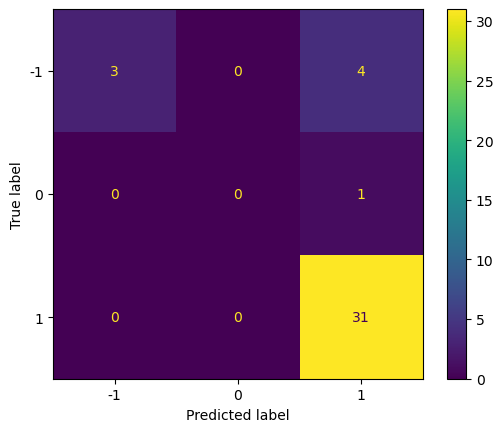

In [24]:
print(confusion_matrix(Ytest, y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))


cm = confusion_matrix(Ytest, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=clf.classes_)

disp.plot()
plt.show()

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(Xtrain_tf, Ytrain)
y_pred = rf_classifier.predict(Xtest_tf)

[[ 3  0  4]
 [ 0  0  1]
 [ 0  0 31]]
0.8717948717948718
              precision    recall  f1-score   support

          -1       1.00      0.43      0.60         7
           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.93        31

    accuracy                           0.87        39
   macro avg       0.62      0.48      0.51        39
weighted avg       0.86      0.87      0.84        39



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


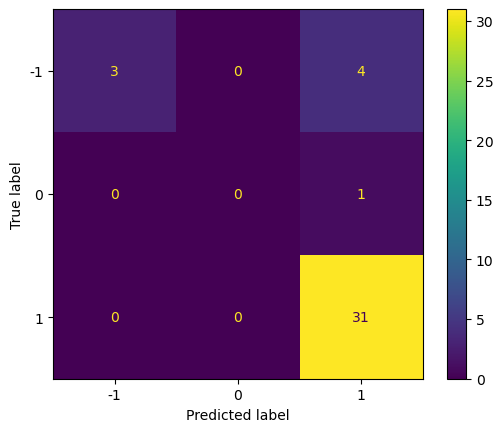

In [26]:
print(confusion_matrix(Ytest, y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

cm_rf = confusion_matrix(Ytest, y_pred, labels=rf_classifier.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_classifier.classes_)

disp_rf.plot()
plt.show()

# SGD

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

[[ 2  0  5]
 [ 0  0  1]
 [ 0  0 31]]
0.8461538461538461
              precision    recall  f1-score   support

          -1       1.00      0.29      0.44         7
           0       0.00      0.00      0.00         1
           1       0.84      1.00      0.91        31

    accuracy                           0.85        39
   macro avg       0.61      0.43      0.45        39
weighted avg       0.85      0.85      0.80        39



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


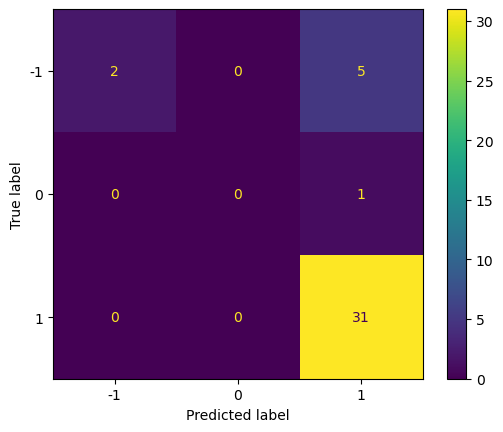

In [28]:
rf_classifier=RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
rf_classifier.fit(Xtrain_tf, Ytrain)
y_pred=rf_classifier.predict(Xtest_tf)
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_classifier.classes_)
disp.plot()
plt.show()

# RandomizedSearchCV

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=0, n_jobs=-1
)

# Perform the search on the training data
random_search.fit(Xtrain_tf, Ytrain)

# Get the best estimator from the search
best_rf_classifier = random_search.best_estimator_

# Make predictions
y_pred_rf = best_rf_classifier.predict(Xtest_tf)

Confusion Matrix:
[[ 2  0  5]
 [ 0  0  1]
 [ 0  0 31]]

Accuracy Score: 0.8461538461538461

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.29      0.44         7
           0       0.00      0.00      0.00         1
           1       0.84      1.00      0.91        31

    accuracy                           0.85        39
   macro avg       0.61      0.43      0.45        39
weighted avg       0.85      0.85      0.80        39



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


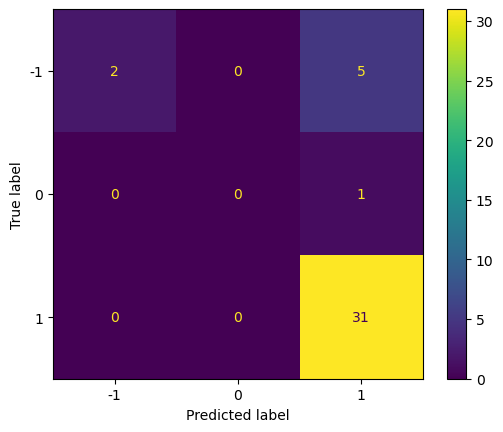

In [30]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Ytest, y_pred_rf))

print("\nAccuracy Score:", accuracy_score(Ytest, y_pred_rf))

print("\nClassification Report:")
print(classification_report(Ytest, y_pred_rf))

# Display confusion matrix
cm_rf = confusion_matrix(Ytest, y_pred_rf, labels=best_rf_classifier.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf_classifier.classes_)

disp_rf.plot()
plt.show()

# Adaboost

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[ 3  0  4]
 [ 0  0  1]
 [ 0  1 30]]
0.8461538461538461
              precision    recall  f1-score   support

          -1       1.00      0.43      0.60         7
           0       0.00      0.00      0.00         1
           1       0.86      0.97      0.91        31

    accuracy                           0.85        39
   macro avg       0.62      0.47      0.50        39
weighted avg       0.86      0.85      0.83        39



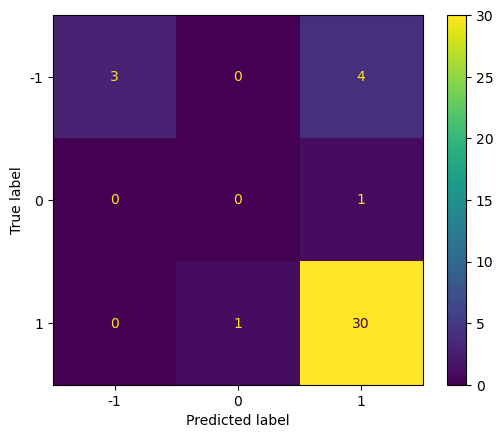

In [31]:
from sklearn.ensemble import AdaBoostClassifier

# Assuming Xtrain_tf, Ytrain, Xtest_tf, Ytest are already defined

# Create and train AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost_classifier.fit(Xtrain_tf, Ytrain)

# Make predictions
y_pred_adaboost = adaboost_classifier.predict(Xtest_tf)

# Print evaluation metrics
print(confusion_matrix(Ytest, y_pred_adaboost))
print(accuracy_score(Ytest, y_pred_adaboost))
print(classification_report(Ytest, y_pred_adaboost))

# Plot confusion matrix
cm_adaboost = confusion_matrix(Ytest, y_pred_adaboost, labels=adaboost_classifier.classes_)
disp_adaboost = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost,
                                       display_labels=adaboost_classifier.classes_)
disp_adaboost.plot()
plt.show()

# GBM

Confusion Matrix:
[[ 3  0  4]
 [ 0  0  1]
 [ 0  0 31]]

Accuracy Score: 0.8717948717948718

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.43      0.60         7
           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.93        31

    accuracy                           0.87        39
   macro avg       0.62      0.48      0.51        39
weighted avg       0.86      0.87      0.84        39



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


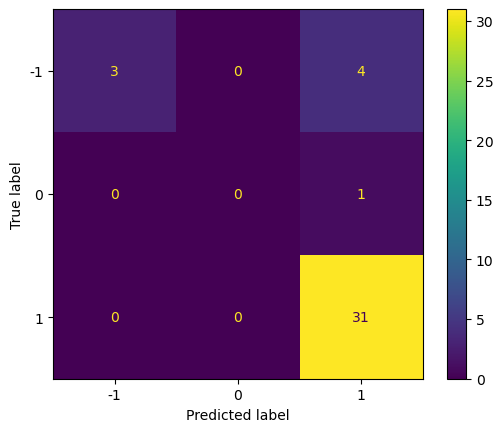

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have your training and testing data: Xtrain_tf, Ytrain, Xtest_tf, Ytest

# Create a Gradient Boosting Classifier
gbm_classifier = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=0.8,
    random_state=0
)

# Train the classifier
gbm_classifier.fit(Xtrain_tf, Ytrain)

# Make predictions
y_pred_gbm = gbm_classifier.predict(Xtest_tf)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Ytest, y_pred_gbm))

print("\nAccuracy Score:", accuracy_score(Ytest, y_pred_gbm))

print("\nClassification Report:")
print(classification_report(Ytest, y_pred_gbm))

# Display confusion matrix
cm_gbm = confusion_matrix(Ytest, y_pred_gbm, labels=gbm_classifier.classes_)
disp_gbm = ConfusionMatrixDisplay(confusion_matrix=cm_gbm, display_labels=gbm_classifier.classes_)

disp_gbm.plot()
plt.show()

In [33]:
# Create a dictionary for classifiers and predictions
classifiers = {
    'Logistic Regression': y_pred,
    'Decision Tree': y_pred,
    'Random Forest': y_pred,
    'Gradient Boosting': y_pred_gbm,
    'AdaBoost': y_pred_adaboost,
    'SVM': y_pred,
    'SGD': y_pred,
    'Naive Bayes': y_pred,
    'RandomizedSearchCV': y_pred_rf
}

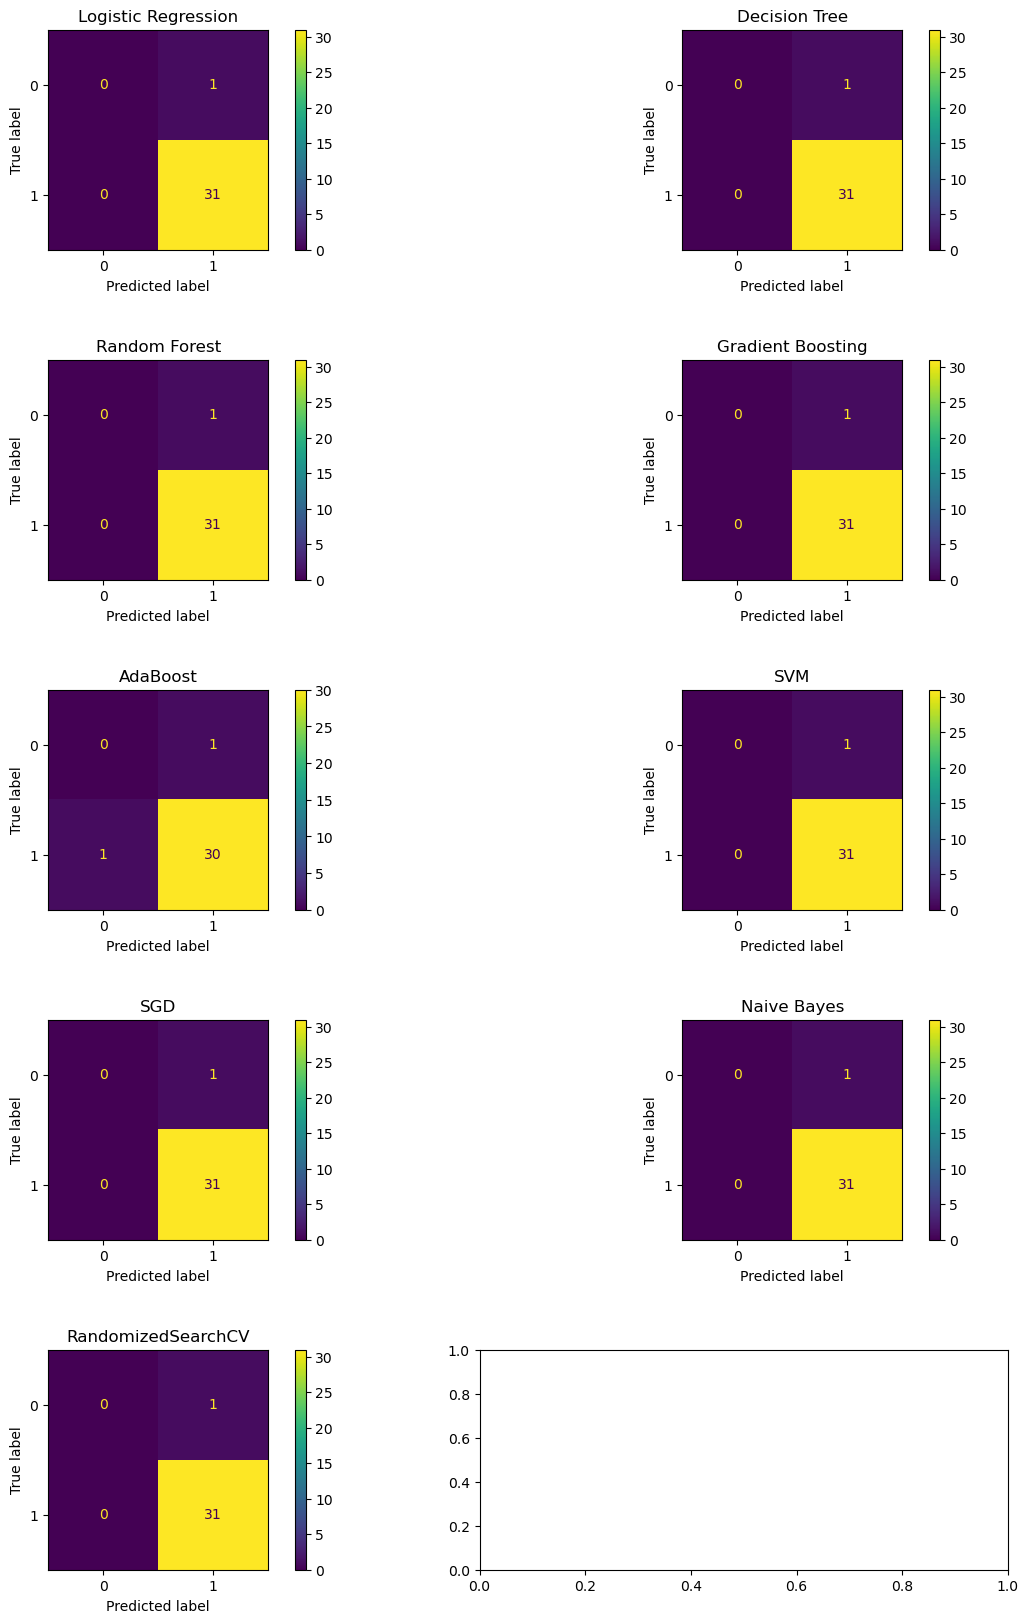

In [34]:
# Plot confusion matrices
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

for (name, pred), ax in zip(classifiers.items(), axes.flatten()):
    cm = confusion_matrix(Ytest, pred, labels=[0, 1])  # Assuming binary classification
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=ax)
    ax.set_title(name)

plt.show()